In [167]:
#IMPORT LIBRARY

In [168]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [169]:
#K observations for each class

In [170]:
k = 1000
q = 0.6

In [171]:
#Initialization of the 4 classes

In [172]:
dfA = pd.DataFrame()
dfB = pd.DataFrame()
dfC = pd.DataFrame()
dfD = pd.DataFrame()

In [173]:
#CREATION of the 4 classes

In [174]:
#A
dfA['X'] = np.random.random([1000]) - q
dfA['Y'] = np.random.random([1000]) + q
dfA['Label'] = 0
#B
dfB['X'] = np.random.random([1000]) + q
dfB['Y'] = np.random.random([1000]) + q
dfB['Label'] = 1
#C
dfC['X'] = np.random.random([1000]) + q
dfC['Y'] = np.random.random([1000]) - q
dfC['Label'] = 0
#D
dfD['X'] = np.random.random([1000]) - q
dfD['Y'] = np.random.random([1000]) - q
dfD['Label'] = 1


In [175]:
#check the validity

In [176]:
dfA.head(3)

,X,Y,Label
0,-0.406185,1.306453,0
1,-0.542597,1.233337,0
2,-0.020201,1.592579,0


In [177]:
#PLOTTING THE CLUSTERS

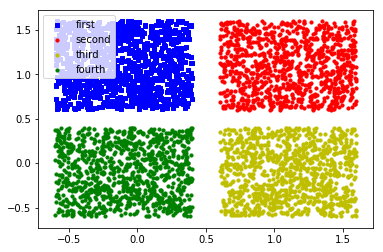

In [178]:
plt.figure(figsize=(10,16))
    
x = range(-2, 2)
y = range(-2,2)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dfA['X'], dfA['Y'], s=10, c='b', marker="s", label='first')
ax1.scatter(dfB['X'], dfB['Y'], s=10, c='r', marker="o", label='second')
ax1.scatter(dfC['X'], dfC['Y'], s=10, c='y', marker="o", label='third')
ax1.scatter(dfD['X'], dfD['Y'], s=10, c='g', marker="o", label='fourth')
plt.legend(loc='upper left');
plt.show()

In [179]:
#CREATE ONE DATAFRAME FOR ALL CLUSTERS

In [180]:
df = pd.concat([dfA, dfB, dfC, dfD])

In [181]:
#VERIFICATION OF THE SHAPE

In [182]:
print(df.shape)
df.head()

(4000, 3)


,X,Y,Label
0,-0.406185,1.306453,0
1,-0.542597,1.233337,0
2,-0.020201,1.592579,0
3,-0.357219,0.778597,0
4,0.235429,0.886531,0


In [183]:
#ENCODE THE LABEL AND REMoVE THE CoLUMN

In [184]:
label = df['Label']
df = df.drop('Label', axis = 1)
df.head(3)

,X,Y
0,-0.406185,1.306453
1,-0.542597,1.233337
2,-0.020201,1.592579


In [185]:
#SPLIT THE DATAFRAME INTO TRAINING and TEST set

In [186]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test =  train_test_split(df, label, test_size=0.2, random_state=777)

In [187]:
#INITIALIZE THE MODEL

In [188]:
model = MLPClassifier(activation='relu', alpha=1e-3, solver='lbfgs', validation_fraction=0.1)
mlp = model.fit(X_train, y_train)

In [189]:
#PREDICT LABELS FOR TEST set

In [190]:
y_predict = mlp.predict(X_test)

In [191]:
#VERIFICATION OF PREDICTION WITH CONFUSION MATRIX

In [192]:
from sklearn.metrics import confusion_matrix

score = mlp.score(X_test, y_test)
print('Score is {}'.format(score))
confusion = confusion_matrix(y_test, y_predict)
confusion = pd.DataFrame(confusion, columns=['0', '1'], index=['0', '1'])
print(confusion)

Score is 1.0
     0    1
0  397    0
1    0  403


In [193]:
#SAME FOR 4 CLUSTERS

SECOND PART FOR ALL CLUSTERS

In [194]:
dfA_b = pd.DataFrame()
dfB_b = pd.DataFrame()
dfC_b = pd.DataFrame()
dfD_b = pd.DataFrame()
#A
dfA_b['X'] = np.random.random([1000]) - q
dfA_b['Y'] = np.random.random([1000]) + q
dfA_b['Label'] = 0
#B
dfB_b['X'] = np.random.random([1000]) + q
dfB_b['Y'] = np.random.random([1000]) + q
dfB_b['Label'] = 1
#C
dfC_b['X'] = np.random.random([1000]) + q
dfC_b['Y'] = np.random.random([1000]) - q
dfC_b['Label'] = 2
#D
dfD_b['X'] = np.random.random([1000]) - q
dfD_b['Y'] = np.random.random([1000]) - q
dfD_b['Label'] = 3

In [195]:
df_b = pd.concat([dfA_b, dfB_b, dfC_b, dfD_b])

In [196]:
label_b = df_b['Label']
df_b = df_b.drop('Label', axis = 1)
df_b.head(3)

,X,Y
0,-0.319847,1.220610
1,0.036112,1.490495
2,-0.318997,1.580895


In [197]:
from sklearn.model_selection import train_test_split 

X_train_b, X_test_b, y_train_b, y_test_b =  train_test_split(df_b, label_b, test_size=0.2, random_state=777)
model_b = MLPClassifier(activation='relu', alpha=1e-3, solver='lbfgs', validation_fraction=0.1)
mlp_b = model_b.fit(X_train_b, y_train_b)

y_predict_b = mlp_b.predict(X_test_b)

from sklearn.metrics import confusion_matrix

score_b = mlp_b.score(X_test_b, y_test_b)
print('Score is {}'.format(score_b))
confusion_b = confusion_matrix(y_test_b, y_predict_b)
confusion_b = pd.DataFrame(confusion_b, columns=['0', '1', '2', '3'], index=['0', '1', '2', '3'])
print(confusion_b)

Score is 1.0
     0    1    2    3
0  211    0    0    0
1    0  208    0    0
2    0    0  186    0
3    0    0    0  195
